# WeatherPy Analytic Result
----

* Temperature has the significant coorelation with Latitude. City is trending to hot when it's place more closer to equator.
* There is no significant coorelation between city's Cloudiness and it's geo-location.
* There is no significant coorelation between city's Wind Speed and it's geo-location.
* City's Humidity has less variation at equator than other cities locate in latitude from -40 to +40.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


758

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
df=pd.DataFrame({'City':cities})
df['Cloudiness']=''
df['Country']=''
df['Date']=''
df['Humidity']=''
df['Lat']=''
df['Lng']=''
df['MaxTemp']=''
df['WindSpeed']=''
df.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,corowa,,,,,,,,
1,east london,,,,,,,,
2,victor harbor,,,,,,,,
3,mataura,,,,,,,,
4,jamestown,,,,,,,,


In [4]:
nan=float('nan')
url = "http://api.openweathermap.org/data/2.5/weather?"
for index, row in df.iterrows():
    city=row['City']
    url2=url+"appid=" + api_key + "&q=" + city
    data=requests.get(url2).json()
    try:
        print(f'Processing record | {city}')
        df.loc[index,'Cloudiness']=data['clouds']['all']
        df.loc[index,'Country']=data['sys']['country']
        df.loc[index,'Date']=data['sys']['sunrise']
        df.loc[index,'Humidity']=data['main']['humidity']
        df.loc[index,'Lat']=data['coord']['lat']
        df.loc[index,'Lng']=data['coord']['lon']
        df.loc[index,'MaxTemp']=((data['main']['temp_max'])-273.15)*9/5+32
        df.loc[index,'WindSpeed']=data['wind']['speed']
    
    except (KeyError):
        print("City not found. Skipping...")
        df.loc[index,'Cloudiness']=nan
        df.loc[index,'Country']=nan
        df.loc[index,'Date']=nan
        df.loc[index,'Humidity']=nan
        df.loc[index,'Lat']=nan
        df.loc[index,'Lng']=nan
        df.loc[index,'MaxTemp']=nan
        df.loc[index,'WindSpeed']=nan
print('__________________________________')
print('Data Retrieval Complete ')
print('__________________________________')

Processing record | corowa
Processing record | east london
Processing record | victor harbor
Processing record | mataura
Processing record | jamestown
Processing record | hermanus
Processing record | atuona
Processing record | canberra
Processing record | bluff
Processing record | arraial do cabo
Processing record | hobart
Processing record | whitehorse
Processing record | hilo
Processing record | amderma
City not found. Skipping...
Processing record | ulladulla
Processing record | sedelnikovo
City not found. Skipping...
Processing record | moranbah
Processing record | airai
Processing record | tuatapere
Processing record | kutulik
Processing record | cidreira
Processing record | omboue
Processing record | tuktoyaktuk
Processing record | kapaa
Processing record | ambilobe
Processing record | kudahuvadhoo
Processing record | butaritari
Processing record | barentsburg
City not found. Skipping...
Processing record | kahului
Processing record | punta arenas
Processing record | cherskiy
Pro

Processing record | sao filipe
Processing record | bathsheba
Processing record | los alamos
Processing record | teguise
Processing record | haines junction
Processing record | cape town
Processing record | cazaje
City not found. Skipping...
Processing record | lucea
Processing record | kavaratti
Processing record | rocha
Processing record | borova
Processing record | suba
Processing record | abu dhabi
Processing record | tokur
Processing record | de-kastri
Processing record | lolua
City not found. Skipping...
Processing record | bengkulu
City not found. Skipping...
Processing record | baker city
Processing record | pevek
Processing record | solnechnyy
Processing record | sarmasu
Processing record | aswan
Processing record | esperance
Processing record | vao
Processing record | veraval
Processing record | suclayin
Processing record | catuday
Processing record | belushya guba
City not found. Skipping...
Processing record | krasnoselkup
City not found. Skipping...
Processing record | honn

Processing record | mosquera
Processing record | san juan de uraba
Processing record | paicandu
Processing record | skalistyy
City not found. Skipping...
Processing record | prince rupert
Processing record | gunnedah
Processing record | eureka
Processing record | forestville
Processing record | turukhansk
Processing record | berlevag
Processing record | carnduff
Processing record | marawi
Processing record | york
Processing record | sakakah
City not found. Skipping...
Processing record | disna
City not found. Skipping...
Processing record | marzuq
Processing record | baoqing
Processing record | pimentel
Processing record | plettenberg bay
Processing record | udarnyy
Processing record | fairbanks
Processing record | leningradskiy
Processing record | strathmore
Processing record | yeppoon
Processing record | shimoda
Processing record | kloulklubed
Processing record | boa vista
Processing record | espanola
Processing record | ridgecrest
Processing record | itarema
Processing record | varh

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df=df.dropna()
df.to_csv("city.csv", encoding="utf-8", index=False, header=True)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,corowa,0,AU,1561325120,100,-36,146.39,37.994,0.5
1,east london,0,ZA,1561353092,88,-33.02,27.91,51.6596,3.05
2,victor harbor,0,AU,1561326912,84,-35.55,138.62,42.008,3.1
3,mataura,100,NZ,1561321699,88,-46.19,168.86,48.992,4.92
4,jamestown,0,AU,1561326552,69,-33.21,138.6,40.5176,7.06


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

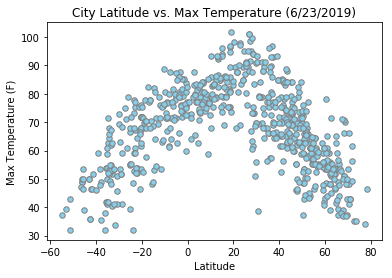

In [6]:
plt.scatter(df['Lat'],df['MaxTemp'], s=30, marker="o", facecolors="skyblue", edgecolors="gray" )
plt.title("City Latitude vs. Max Temperature (6/23/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("temp.png")

#### Latitude vs. Humidity Plot

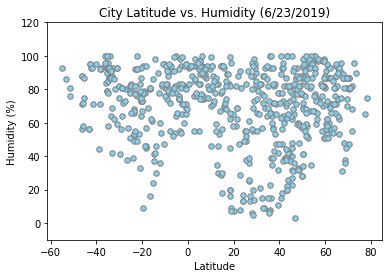

In [11]:
plt.scatter(df['Lat'],df['Humidity'], s=30, marker="o", facecolors="skyblue", edgecolors="gray" )
plt.title("City Latitude vs. Humidity (6/23/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-10,120)
plt.savefig("humidity.png")

#### Latitude vs. Cloudiness Plot

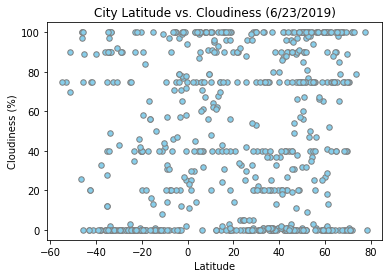

In [8]:
plt.scatter(df['Lat'],df['Cloudiness'], s=30, marker="o", facecolors="skyblue", edgecolors="gray" )
plt.title("City Latitude vs. Cloudiness (6/23/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("cloudiness.png")

#### Latitude vs. Wind Speed Plot

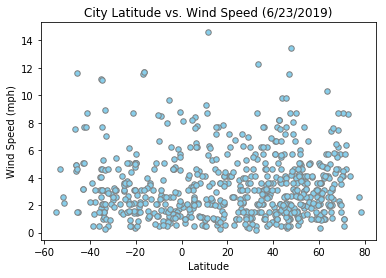

In [9]:
plt.scatter(df['Lat'],df['WindSpeed'], s=30, marker="o", facecolors="skyblue", edgecolors="gray" )
plt.title("City Latitude vs. Wind Speed (6/23/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("windspeed.png")